In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/possum.csv")

In [4]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [9]:
df_nans_dropped = df.dropna()
df_nans_filled = df.fillna(df.mean())

<ipython-input-9-5f0a9cb6f1f7>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_nans_filled = df.fillna(df.mean())


In [15]:
df_x = df_nans_filled.drop(labels=["case", "site", "Pop","sex"], axis=1)
df_y = df_nans_filled[['sex']]

In [16]:
df_x.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [17]:
df_y.head()

,sex
0,m
1,f
2,f
3,f
4,f


In [18]:
df_y[['sex']] = df_y[['sex']].replace({'f': 1, 'm': 0})

<ipython-input-18-b4adbd70375a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y[['sex']] = df_y[['sex']].replace({'f': 1, 'm': 0})


In [19]:
df_y.head()

,sex
0,0
1,1
2,1
3,1
4,1


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_nrm = scaler.fit_transform(df_x)

In [22]:
from sklearn.model_selection import train_test_split
df_x_train, df_x_test, y_train, y_test = train_test_split(x_nrm, df_y.values.reshape((-1, )), train_size=0.8)

print(df_x_train.shape, y_train.shape, df_x_test.shape, y_test.shape)

(83, 10) (83,) (21, 10) (21,)


In [62]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(32, activation='relu', input_shape=df_x_train.shape[1:]))

# model.add(Dense(32, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, 'sigmoid'))

In [63]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics="acc")

In [64]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 32)                352       
                                                                 
 dense_27 (Dense)            (None, 8)                 264       
                                                                 
 dense_28 (Dense)            (None, 1)                 9         
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [65]:
results = model.fit(
    df_x_train, y_train, epochs=16,
    validation_data=(df_x_test, y_test), batch_size=4)

Epoch 1/16
21/21 [==============================] - 1s 11ms/step - loss: 0.7639 - acc: 0.3735 - val_loss: 0.7177 - val_acc: 0.4286
Epoch 2/16
21/21 [==============================] - 0s 4ms/step - loss: 0.7129 - acc: 0.4458 - val_loss: 0.6923 - val_acc: 0.5714
Epoch 3/16
21/21 [==============================] - 0s 4ms/step - loss: 0.6878 - acc: 0.5422 - val_loss: 0.6740 - val_acc: 0.7143
Epoch 4/16
21/21 [==============================] - 0s 3ms/step - loss: 0.6726 - acc: 0.6024 - val_loss: 0.6682 - val_acc: 0.6190
Epoch 5/16
21/21 [==============================] - 0s 4ms/step - loss: 0.6580 - acc: 0.6506 - val_loss: 0.6615 - val_acc: 0.6190
Epoch 6/16
21/21 [==============================] - 0s 3ms/step - loss: 0.6459 - acc: 0.6747 - val_loss: 0.6578 - val_acc: 0.6190
Epoch 7/16
21/21 [==============================] - 0s 3ms/step - loss: 0.6352 - acc: 0.6627 - val_loss: 0.6527 - val_acc: 0.6190
Epoch 8/16
21/21 [==============================] - 0s 3ms/step - loss: 0.6227 - acc: 0.7

In [66]:
import matplotlib.pyplot as plt

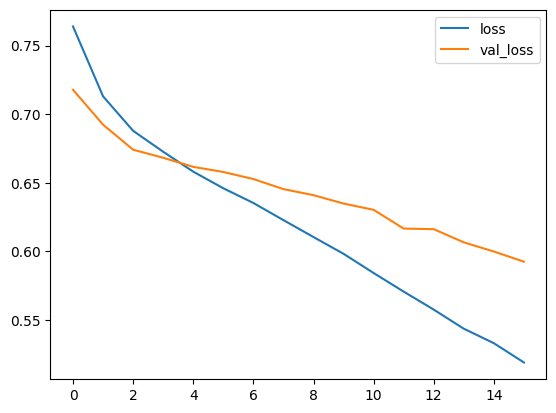

In [67]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.legend()

In [68]:
yhat_train = model.predict(df_x_train).round()
yhat_test = model.predict(df_x_test).round()

1/1 [==============================] - 0s 15ms/step


In [69]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm

print(cr(y_train, yhat_train))
print(cr(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        49
           1       0.80      0.71      0.75        34

    accuracy                           0.81        83
   macro avg       0.81      0.79      0.80        83
weighted avg       0.81      0.81      0.80        83

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.83      0.56      0.67         9

    accuracy                           0.76        21
   macro avg       0.78      0.74      0.74        21
weighted avg       0.78      0.76      0.75        21



In [70]:
print(cm(y_train, yhat_train))
print(cm(y_test, yhat_test))

[[43  6]
 [10 24]]
[[11  1]
 [ 4  5]]
